In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('jedinstveni.csv')
df.drop(columns=['Broj sedišta'], inplace=True)
df.drop(columns=['Boja enterijera'], inplace=True)
#Strana volana je uvek leva
df = df.drop('Strana volana', axis=1)
#Stanje je na svim automobilima uneseno kao polovno vozilo
df = df.drop('Stanje', axis=1)

In [2]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                  10
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera     519
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Features          140
Equipment_Features       133
dtype: int64

<Axes: >

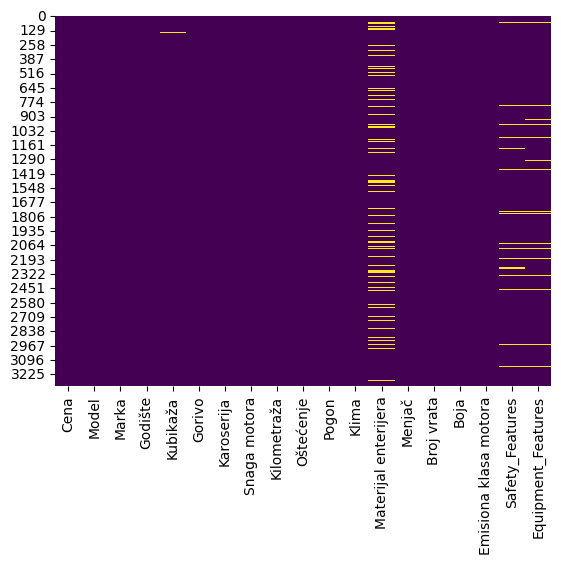

In [3]:
#vizualizacija nedostajucih vrednosti po kolonama
import seaborn as seab
seab.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [4]:
missing_rows = df[df['Kubikaža'].isnull()]
print(missing_rows)


          Cena    Model       Marka  Godište Kubikaža            Gorivo  \
146   22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
556    7.400 €   ForTwo       Smart   2015.0      NaN  Električni pogon   
1787  22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
2577  11.999 €  ForFour       Smart   2017.0      NaN  Električni pogon   
2649  19.100 €     Kona     Hyundai   2018.0      NaN  Električni pogon   
2775   9.900 €   ForTwo       Smart   2017.0      NaN  Električni pogon   
2962   7.990 €      iOn     Peugeot   2016.0      NaN  Električni pogon   
2979  15.000 €     Leaf      Nissan   2018.0      NaN  Električni pogon   
3075  20.000 €   Golf 7  Volkswagen   2018.0      NaN  Električni pogon   
3093   6.700 €   C-Zero     Citroen   2017.0      NaN  Električni pogon   

     Karoserija     Snaga motora Kilometraža     Oštećenje    Pogon  \
146    Limuzina  310/421 (kW/KS)  163.421 km  Nije oštećen   Zadnji   
556      Hečbek    17/23 (kW/KS)

In [5]:
print(missing_rows['Kubikaža'], missing_rows['Gorivo'])

146     NaN
556     NaN
1787    NaN
2577    NaN
2649    NaN
2775    NaN
2962    NaN
2979    NaN
3075    NaN
3093    NaN
Name: Kubikaža, dtype: object 146     Električni pogon
556     Električni pogon
1787    Električni pogon
2577    Električni pogon
2649    Električni pogon
2775    Električni pogon
2962    Električni pogon
2979    Električni pogon
3075    Električni pogon
3093    Električni pogon
Name: Gorivo, dtype: object


In [6]:
df['Gorivo'].value_counts()

Gorivo
Dizel                      2300
Benzin                      820
Benzin + Gas (TNG)          131
Benzin + Metan (CNG)         36
Hibridni pogon               18
Električni pogon             10
Hibridni pogon (Benzin)       6
Hibridni pogon (Dizel)        6
Plug-in hibrid                1
Name: count, dtype: int64

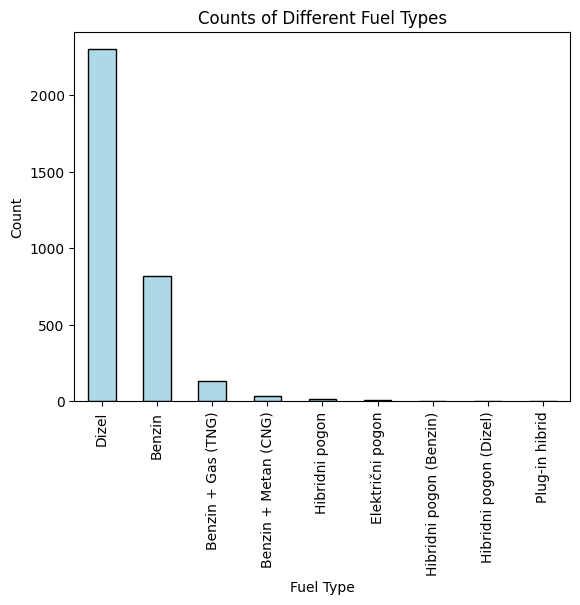

In [7]:
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [8]:
#Zakljucujemo da ne zelimo da radimo sa elektricnim i hibridnim vozililma jer ih ima ukupno 41 (premalo)
#Benzin u kombiniciji sa TNG i CNG cemo spojiti u jednu kategoriju
def categorize_fuel(value):
    if value == 'Dizel':
        return 'Dizel'
    elif value == 'Benzin':
        return 'Benzin'
    elif value in ['Benzin + Gas (TNG)', 'Benzin + Metan (CNG)']:
        return 'Gas'
    else:
        return 'Other'

df['Gorivo'] = df['Gorivo'].apply(categorize_fuel)

df = df[df['Gorivo'] != 'Other']

Gorivo
Dizel     2300
Benzin     820
Gas        167
Name: count, dtype: int64


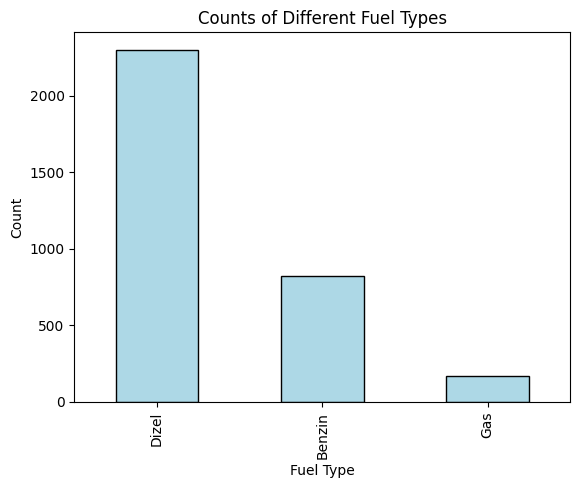

In [9]:
#Prema tipu goriva skup nije balansiran
print(df['Gorivo'].value_counts())
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [10]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera     517
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Features          138
Equipment_Features       132
dtype: int64

In [11]:
# iz safety features i equipment smo pretrazivali samo koliko imaju iz skupa izabranih
# a ako uopste nema vrednosti nikakve onda stavljamo missing kao broj
valid_safety_features = ["Airbag", "Child lock", "ABS", "Blokada motora", "Ulazak bez ključa"]
def count_valid_safety_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_safety_features))
    return 'missing'
df['Safety_Feature_Count'] = df['Safety_Features'].apply(count_valid_safety_features)
valid_equipment_features = ["Sportska sedišta", "Tempomat", "Senzori za kišu", "Parking senzori", "Aluminijumske felne", "Multimedija"]
def count_valid_equipment_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_equipment_features))
    return 'missing'
df['Equipment_Feature_Count'] = df['Equipment_Features'].apply(count_valid_equipment_features)

df = df.drop('Safety_Features', axis=1)
df = df.drop('Equipment_Features', axis=1)

print(df[['Safety_Feature_Count', 'Equipment_Feature_Count']])

     Safety_Feature_Count Equipment_Feature_Count
0                       4                       2
1                       4                       4
2                       4                       1
3                       4                       3
4                       4                       1
...                   ...                     ...
3323                    3                       5
3324                    4                       5
3325                    3                       5
3326              missing                 missing
3327                    5                       5

[3287 rows x 2 columns]


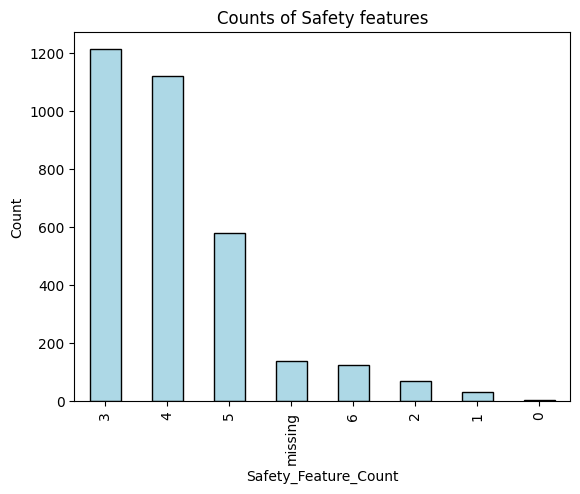

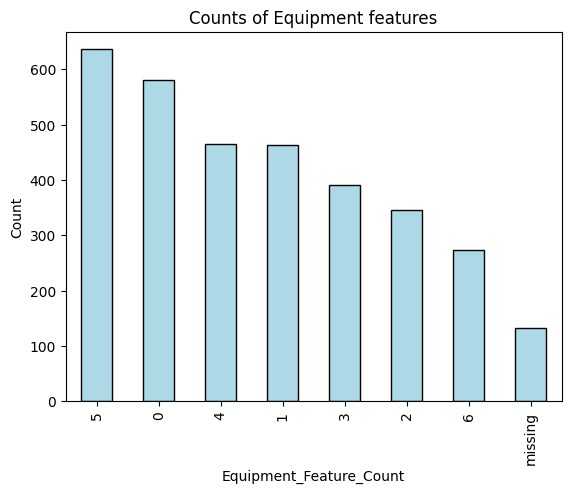

In [12]:
#Nedostajuce vrednosti cemo interpolirati zato sto se radi o nebalansiranom skupu slicnom normalnoj raspodeli
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [13]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
# import scipy as sc
df['Safety_Feature_Count'] = pd.to_numeric(df['Safety_Feature_Count'], errors='coerce')

# Interpolate missing values using polynomial interpolation
df['Safety_Feature_Count'] = df['Safety_Feature_Count'].interpolate(method='polynomial', order=2).round().clip(upper=6)

print(df['Safety_Feature_Count'].value_counts())


Safety_Feature_Count
3.0    1253
4.0    1173
5.0     602
6.0     133
2.0      87
1.0      35
0.0       4
Name: count, dtype: int64


In [14]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Equipment_Feature_Count'] = pd.to_numeric(df['Equipment_Feature_Count'], errors='coerce')

# Calculate the median of 'Equipment_Feature_Count' excluding 'NaN' values
median_value = df['Equipment_Feature_Count'].median()

# Replace 'NaN' (which represents 'missing') with the calculated median
df['Equipment_Feature_Count'] = df['Equipment_Feature_Count'].fillna(median_value)

print(df['Equipment_Feature_Count'].value_counts())

Equipment_Feature_Count
5.0    636
0.0    580
3.0    523
4.0    465
1.0    464
2.0    346
6.0    273
Name: count, dtype: int64


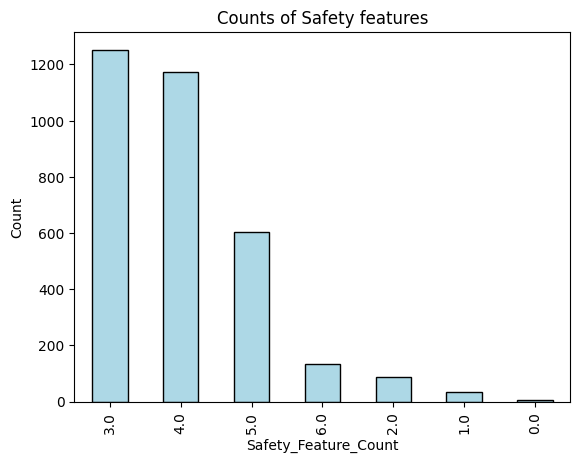

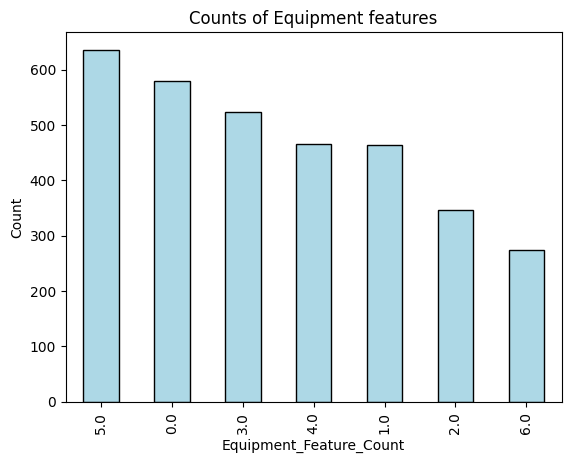

In [15]:
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija bila relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [16]:
#Posto nedostajucih vrednosti ima oko 500,600 mozemo iskoristiti dodavanje nove kategorije 'nepoznato' za njih
df['Materijal enterijera'] = df['Materijal enterijera'].fillna('Nepoznato')
print(df['Materijal enterijera'].value_counts())

Materijal enterijera
Štof                1767
Nepoznato            517
Prirodna koža        512
Kombinovana koža     404
Drugi                 49
Velur                 38
Name: count, dtype: int64


In [17]:
#Sada nemamo vise nedostajucih vrednosti
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera       0
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Feature_Count       0
Equipment_Feature_Count    0
dtype: int64

In [18]:
def clean_currency(value):
    return float(value.replace('€', '').replace('.', '').strip())
def clean_mileage(value):
    return float(value.replace('km', '').replace('.', '').strip())
def clean_engine_volume(value):
    if "cm3" in value:
        return float(value.replace('cm3', '').replace('.', '').strip())
    return value 
def extract_kw(value):
    return float(value.split('/')[0].strip())

In [19]:
df['Cena'] = df['Cena'].apply(clean_currency)
df['Kilometraža'] = df['Kilometraža'].apply(clean_mileage)
df['Snaga motora'] = df['Snaga motora'].apply(extract_kw)
df['Kubikaža'] = df['Kubikaža'].apply(clean_engine_volume)
print(df)

         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0    1686.0  Dizel   
1      9500.0                 A3           Audi   2013.0    1598.0  Dizel   
2      4000.0            Octavia          Škoda   2008.0    1896.0  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0    1991.0  Dizel   
4      3550.0            Corsa D           Opel   2009.0    1229.0    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0    2993.0  Dizel   
3324  17500.0                 A4           Audi   2016.0    1968.0  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0    1598.0  Dizel   
3326  13500.0             Superb          Škoda   2017.0    2000.0  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0    1999.0  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [20]:
# izbacivanje duplikata nakon ciscenja podataka (ukoliko se neki sakrio)
print(df.shape[0])
df = df.drop_duplicates()
print(df.shape[0])

3287
3264


In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

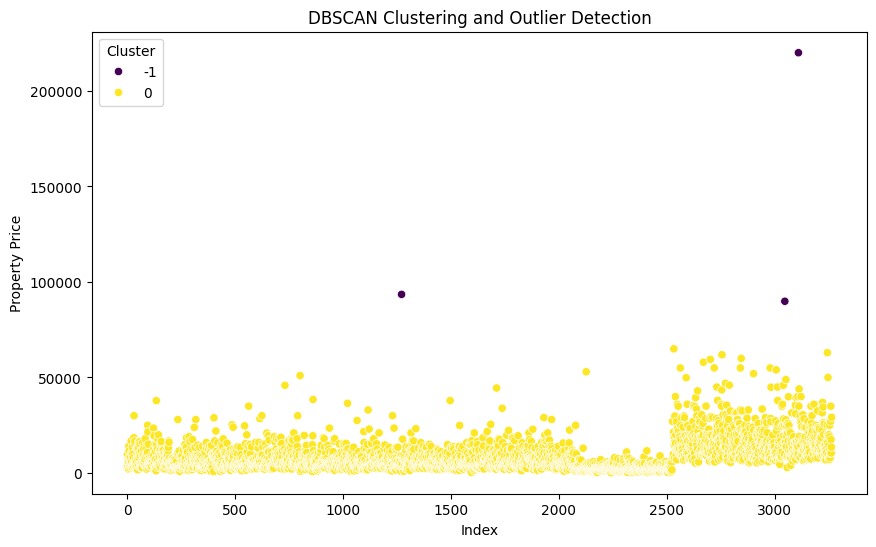

Detected Outliers:
          Cena     Model          Marka  Godište  Kubikaža  Gorivo Karoserija  \
1296   93500.0  S 63 AMG  Mercedes Benz   2015.0    5461.0  Benzin       Kupe   
3100   89900.0     G 350  Mercedes Benz   2018.0    2987.0   Dizel   Džip/SUV   
3166  220000.0      Urus    Lamborghini   2018.0    3996.0  Benzin   Džip/SUV   

      Snaga motora  Kilometraža     Oštećenje Pogon             Klima  \
1296         430.0     119983.0  Nije oštećen   4x4  Automatska klima   
3100         180.0      28165.0  Nije oštećen   4x4  Automatska klima   
3166         478.0      84193.0  Nije oštećen   4x4  Automatska klima   

     Materijal enterijera                       Menjač Broj vrata    Boja  \
1296     Kombinovana koža  Automatski / poluautomatski  2/3 vrata    Crna   
3100        Prirodna koža  Automatski / poluautomatski  4/5 vrata  Zelena   
3166        Prirodna koža  Automatski / poluautomatski  4/5 vrata    Siva   

     Emisiona klasa motora  Safety_Feature_Count  Equi

In [22]:
prices = df[['Cena']].values

# Step 3: Normalize or scale the data (optional, depending on the range of prices)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices)

# Step 4: Apply DBSCAN
# Adjust eps (radius) and min_samples (minimum points in a cluster) based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(prices_scaled)

# Step 5: Add DBSCAN labels to the dataframe
df['Cluster'] = labels

# Outliers are labeled as -1 by DBSCAN
outliers = df[df['Cluster'] == -1]

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=range(len(df)), y='Cena', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering and Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Property Price')
plt.legend(title='Cluster')
plt.show()

# Step 7: Save or analyze the outliers
print("Detected Outliers:")
print(outliers)

In [23]:
# nakon detektovanja outlier-a izbacicemo ih iz skupa
df = df[df['Cluster'] != -1].drop(columns=['Cluster'])

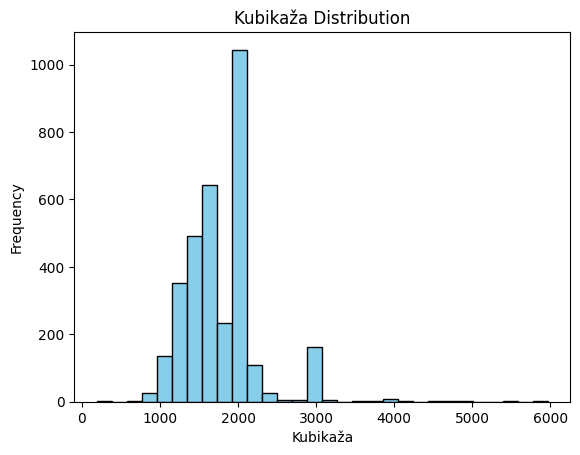

In [24]:
# treba malo pogledati raspodele stvari koje normalizujemo
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['Kubikaža'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Kubikaža')
plt.ylabel('Frequency')
plt.title('Kubikaža Distribution')
plt.show()


In [25]:
# normalizacija velikih kontinualnih vrednosti pomocu standard scaler-a
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Kubikaža'] = scaler.fit_transform(df[['Kubikaža']])
df['Kilometraža'] = scaler.fit_transform(df[['Kilometraža']])
df['Snaga motora'] = scaler.fit_transform(df[['Snaga motora']])


# Display the first few rows to check the result
print(df)


         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051  Dizel   
1      9500.0                 A3           Audi   2013.0 -0.339346  Dizel   
2      4000.0            Octavia          Škoda   2008.0  0.281356  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231  Dizel   
4      3550.0            Corsa D           Opel   2009.0 -1.107933    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0  2.566288  Dizel   
3324  17500.0                 A4           Audi   2016.0  0.431324  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346  Dizel   
3326  13500.0             Superb          Škoda   2017.0  0.497977  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [26]:
# proveravamo vrednosti za enkodiranje one hotom
df['Menjač'].value_counts()

Menjač
Manuelni 5 brzina              1245
Manuelni 6 brzina              1019
Automatski / poluautomatski     995
Manuelni 4 brzine                 2
Name: count, dtype: int64

In [27]:
# spajamo sve manuelne u jednu kategoriju
def categorize_gear_shift(value):
    if value == 'Automatski / poluautomatski':
        return 'Automatski'
    elif value in ['Manuelni 5 brzina', 'Manuelni 6 brzina', 'Manuelni 4 brzine']:
        return 'Manuelni'
    else:
        return 'Other'

df['Menjač'] = df['Menjač'].apply(categorize_gear_shift)


In [28]:
# radimo one hot encoding, stvori se nova kolona koja samo ima true false
df = pd.get_dummies(df, columns=['Menjač'], drop_first=True)
df['Menjač_Manuelni'] = df['Menjač_Manuelni'].astype(int)

In [29]:
print(df)

         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051  Dizel   
1      9500.0                 A3           Audi   2013.0 -0.339346  Dizel   
2      4000.0            Octavia          Škoda   2008.0  0.281356  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231  Dizel   
4      3550.0            Corsa D           Opel   2009.0 -1.107933    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0  2.566288  Dizel   
3324  17500.0                 A4           Audi   2016.0  0.431324  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346  Dizel   
3326  13500.0             Superb          Škoda   2017.0  0.497977  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [30]:
df['Pogon'].value_counts()

Pogon
Prednji         2383
4x4              505
Zadnji           312
4x4 reduktor      61
Name: count, dtype: int64

In [31]:
def categorize_pogon(value):
    if value == 'Prednji':
        return 'Prednji'
    elif value == 'Zadnji':
        return 'Zadnji'
    elif value in ['4x4', '4x4 reduktor']:
        return '4x4'
    else:
        return 'Other'

df['Pogon'] = df['Pogon'].apply(categorize_pogon)

In [32]:
df['Karoserija'].value_counts()

Karoserija
Hečbek      1353
Limuzina     698
Džip/SUV     567
Karavan      527
Kupe         116
Name: count, dtype: int64

In [33]:
df['Emisiona klasa motora'].value_counts()

Emisiona klasa motora
Euro 4    1120
Euro 5     937
Euro 6     914
Euro 3     277
Euro 1       8
Euro 2       5
Name: count, dtype: int64

In [34]:
df = df[df['Emisiona klasa motora'] != 'Euro 1']
df = df[df['Emisiona klasa motora'] != 'Euro 2']

In [35]:
# label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

df['Pogon'] = label_encoder.fit_transform(df['Pogon'])
df['Karoserija'] = label_encoder.fit_transform(df['Karoserija'])
df['Emisiona klasa motora'] = label_encoder.fit_transform(df['Emisiona klasa motora'])
df['Gorivo'] = label_encoder.fit_transform(df['Gorivo'])


In [36]:
# ovde sad zavrsavamo
print(df)

         Cena              Model          Marka  Godište  Kubikaža  Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051       1   
1      9500.0                 A3           Audi   2013.0 -0.339346       1   
2      4000.0            Octavia          Škoda   2008.0  0.281356       1   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231       1   
4      3550.0            Corsa D           Opel   2009.0 -1.107933       2   
...       ...                ...            ...      ...       ...     ...   
3323  34990.0                730            BMW   2016.0  2.566288       1   
3324  17500.0                 A4           Audi   2016.0  0.431324       1   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346       1   
3326  13500.0             Superb          Škoda   2017.0  0.497977       1   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894       1   

      Karoserija  Snaga motora  Kilometraža     Oštećenje  Pogo

In [37]:
df['Materijal enterijera'].value_counts()

Materijal enterijera
Štof                1753
Nepoznato            512
Prirodna koža        501
Kombinovana koža     396
Drugi                 49
Velur                 37
Name: count, dtype: int64

In [38]:
# EDA
print(df.head())

     Cena    Model          Marka  Godište  Kubikaža  Gorivo  Karoserija  \
0  3200.0  Astra H           Opel   2006.0 -0.156051       1           1   
1  9500.0       A3           Audi   2013.0 -0.339346       1           1   
2  4000.0  Octavia          Škoda   2008.0  0.281356       1           4   
3  3300.0    A 180  Mercedes Benz   2008.0  0.479231       1           1   
4  3550.0  Corsa D           Opel   2009.0 -1.107933       2           1   

   Snaga motora  Kilometraža     Oštećenje  Pogon             Klima  \
0     -0.553718     0.624057  Nije oštećen      1  Automatska klima   
1     -0.479255    -0.020582  Nije oštećen      1    Manuelna klima   
2     -0.479255     0.518757  Nije oštećen      1  Automatska klima   
3     -0.404792    -0.049934  Nije oštećen      1    Manuelna klima   
4     -0.926032     0.368513  Nije oštećen      1    Manuelna klima   

  Materijal enterijera Broj vrata   Boja  Emisiona klasa motora  \
0            Nepoznato  4/5 vrata  Plava         

In [39]:
# da vidimo da li uopste ima kakav uticaj na cenu pa ako ima onda mozemo enkodirati one hot-om ako ne onda izbacimo
# da bismo olaksali analizu zavisnosti između obeležja, sva nenumericka obeležja će biti pretvorena u numerička
#print(df.head()) # obeležja koja treba pretvoriti su model, marka, ostecenje, klima, materijal enterijera, broj vrata
#broj vrata
df['Broj vrata'].value_counts() # dosta nebalansiran skup
df['Cetiri_Vrata'] = (df['Broj vrata'] == '4/5 vrata').astype(int)
df['Cetiri_Vrata'].value_counts()
df = df.drop('Broj vrata', axis=1)

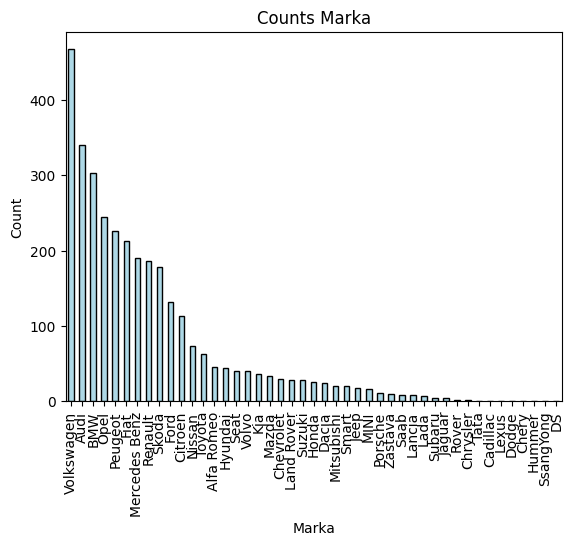

In [40]:
# da vidimo da li uopste ima kakav uticaj na cenu pa ako ima onda mozemo enkodirati one hot-om ako ne onda izbacimo
# da bismo olaksali analizu zavisnosti između obiležja, sva nenumericka obeležja će biti pretvorena u numerička
#print(df.head()) # obeležja koja treba pretvoriti su model, marka, ostecenje, klima, materijal enterijera, broj vrata
df['Model'].value_counts() # 387 modela automobila ------ previše svakako, ovu kolonu izbacujemo -- ako ne treba mozemo je enkodovati i kao sljedecu metodu
df = df.drop('Model', axis=1)
df['Marka'].value_counts() # 47 marki automobila.
df['Marka'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts Marka')
plt.ylabel('Count')
plt.show()

#veliki broj klasa, koristićemo frequent encoding ---- bas zato sto je nebalansiran skup, mijenja se kategorija sa brojem pojavljivanja u skupu
frequency_map = df['Marka'].value_counts(normalize=True)
df['Marka'] = df['Marka'].map(frequency_map)


In [41]:

print(df['Marka'])


0       0.075431
1       0.104680
2       0.054803
3       0.058805
4       0.075431
          ...   
3323    0.093288
3324    0.104680
3325    0.143781
3326    0.054803
3327    0.008621
Name: Marka, Length: 3248, dtype: float64


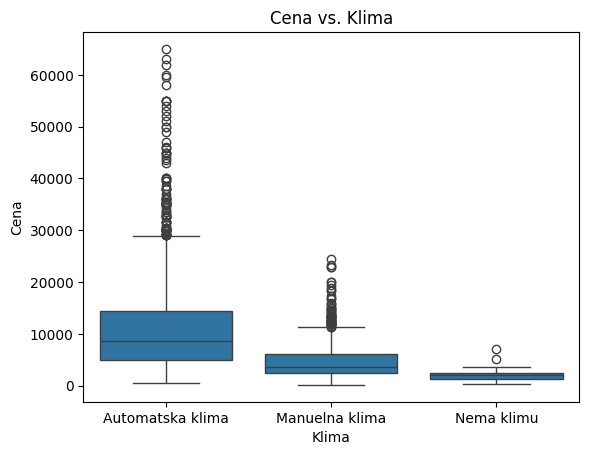

In [42]:
# izbacicemo ove sto nemaju najveovatnije a onda one hot encoding
df['Klima'].value_counts()
sns.boxplot(x='Klima', y='Cena', data=df)
plt.title('Cena vs. Klima')
plt.show()
# na osnovu plota vidim da imamo dosta autlajera


In [43]:
df = df[df['Klima'] != "Nema klimu"]
#one hot encoding
#df = pd.get_dummies(df, columns=['Klima'], drop_first=True)
df['Klima'].value_counts()
# one hot encoding 
df['Automatska_Klima'] = (df['Klima'] == 'Automatska klima').astype(int)
df = df.drop('Klima', axis = 1)
print(df)

         Cena     Marka  Godište  Kubikaža  Gorivo  Karoserija  Snaga motora  \
0      3200.0  0.075431   2006.0 -0.156051       1           1     -0.553718   
1      9500.0  0.104680   2013.0 -0.339346       1           1     -0.479255   
2      4000.0  0.054803   2008.0  0.281356       1           4     -0.479255   
3      3300.0  0.058805   2008.0  0.479231       1           1     -0.404792   
4      3550.0  0.075431   2009.0 -1.107933       2           1     -0.926032   
...       ...       ...      ...       ...     ...         ...           ...   
3323  34990.0  0.093288   2016.0  2.566288       1           4      2.449617   
3324  17500.0  0.104680   2016.0  0.431324       1           4      0.339836   
3325  10500.0  0.143781   2017.0 -0.339346       1           1     -0.752286   
3326  13500.0  0.054803   2017.0  0.497977       1           4      0.339836   
3327  29200.0  0.008621   2017.0  0.495894       1           0      0.885897   

      Kilometraža     Oštećenje  Pogon 

In [44]:
df['Cena'].value_counts()

Cena
4500.0     42
3500.0     37
2500.0     34
4200.0     32
3000.0     31
           ..
16850.0     1
39900.0     1
13599.0     1
30990.0     1
29200.0     1
Name: count, Length: 674, dtype: int64

In [45]:
# jako nebalansirano, ostecenje utice na cenu, izbacicemo ostecena auta!
df['Oštećenje'].value_counts()

#provera kako ostecenje utice na cenu -- korisitmo tzv analizu varianse (Analysis of variance) tj. koliko srednja vrednost cene se menja kroy kategorije

from scipy.stats import f_oneway
#rucno je da znamo na koje se klase odnosi
groups = [df['Cena'][df['Oštećenje'] == cat] for cat in df['Oštećenje'].unique()]
f_stat, p_val = f_oneway(*groups)

print(f'F-statistic: {f_stat}, p-value: {p_val}')


F-statistic: 20.602234326133576, p-value: 1.2879823369468487e-09


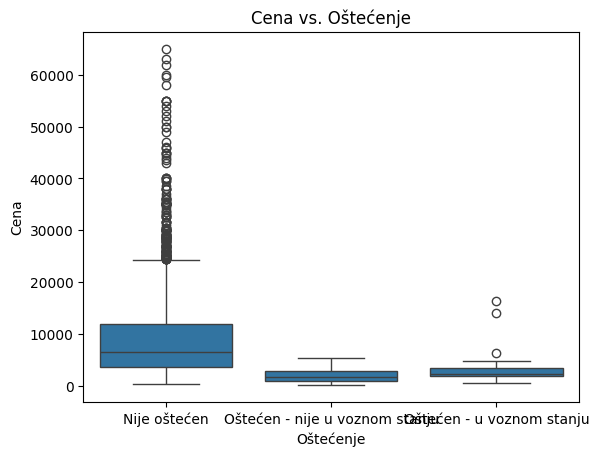

In [46]:
#kako je je p jako malo, to ukazuje da postoji jako velika razlika srednje cene po kategoriji me]u kategorijama
sns.boxplot(x='Oštećenje', y='Cena', data=df)
plt.title('Cena vs. Oštećenje')
plt.show()


In [47]:
# plotovi stecenih su mnogo manji u odnosu na  one koji nije ostecen. Takodje, vidimo da imamo dosta autlajera u neostecenim.
# vidimo da ostecene mozemo izbaciti -- previse su velike oscilacije u ceni. mnogo uticu na cenu.
#izbacujemo automobile koji su osteceni i uklonicemo ovo polje jer ce biti identicno za svaki podatak
df = df[df['Oštećenje'] == 'Nije oštećen']
#df['Oštećenje'].value_counts()
df = df.drop('Oštećenje', axis=1)

In [48]:
df['Boja'].value_counts() # 20 tipova -- label encoding
# Bež, krem i smeđu ćemo spojiti sa braon. bordo spajamo sa crvenom. Tirkiz i teget se spaja sa plavom.
df['Boja'] = df['Boja'].replace('Bordo', 'Crvena')
df['Boja'] = df['Boja'].replace('Tirkiz', 'Plava')
df['Boja'] = df['Boja'].replace('Teget', 'Plava')
df['Boja'] = df['Boja'].replace('Krem', 'Braon')
df['Boja'] = df['Boja'].replace('Bež', 'Braon')
df['Boja'] = df['Boja'].replace('Smeđa', 'Braon')
df['Boja'].value_counts() 

#vidjeti koje izbaciti da se smanji dimenzionalnost

Boja
Siva           980
Crna           843
Bela           510
Plava          332
Crvena         192
Srebrna         83
Braon           82
Zelena          31
Zlatna          26
Narandžasta     18
Kameleon        11
Ljubičasta       9
Žuta             8
Name: count, dtype: int64

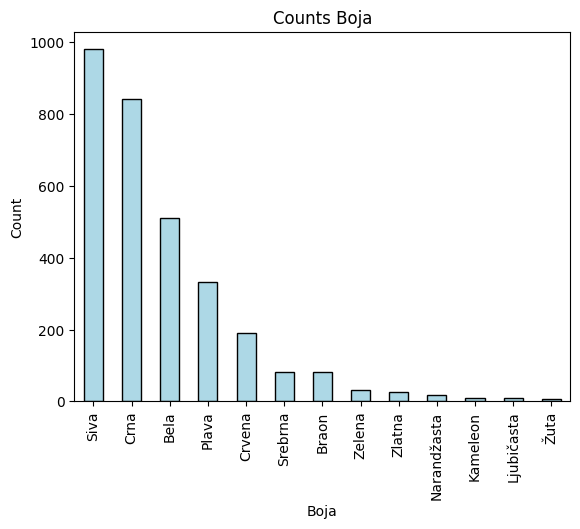

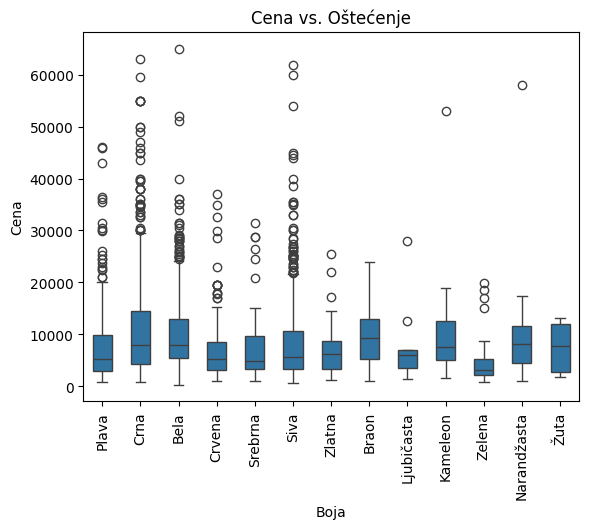

3079


In [49]:
df['Boja'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts Boja')
plt.ylabel('Count')
plt.show()


sns.boxplot(x='Boja', y='Cena',width= 0.5, data=df) #ovaj skloniti previse je kategorija
plt.title('Cena vs. Oštećenje')
plt.xticks(rotation=90)
plt.show()
#Izbacujemo zutu, ljubicastu, kameleon i narandzastu jer ih ima premalo.
removing_colors = ['Žuta','Ljubičasta','Kameleon','Narandžasta']
mask = ~df['Boja'].isin(removing_colors)
df = df[mask]
df['Boja'].value_counts()
print(df.shape[0])

# label encoding. Zbog borja klasa razmisliti o feature encodingu
df['Boja'] = label_encoder.fit_transform(df['Boja'])


In [50]:
df['Materijal enterijera'].value_counts()
#Velur i drugi ima prilicno malo automobila u odnosu na ostale --- izbacujemo ih
removing_materials = ['Drugi','Velur']
mask1 = ~df['Materijal enterijera'].isin(removing_materials)
df = df[mask1]


In [51]:
# label encoding. Zbog borja klasa razmisliti o feature encodingu
df['Materijal enterijera'] = label_encoder.fit_transform(df['Materijal enterijera'])
print(df)

         Cena     Marka  Godište  Kubikaža  Gorivo  Karoserija  Snaga motora  \
0      3200.0  0.075431   2006.0 -0.156051       1           1     -0.553718   
1      9500.0  0.104680   2013.0 -0.339346       1           1     -0.479255   
2      4000.0  0.054803   2008.0  0.281356       1           4     -0.479255   
3      3300.0  0.058805   2008.0  0.479231       1           1     -0.404792   
4      3550.0  0.075431   2009.0 -1.107933       2           1     -0.926032   
...       ...       ...      ...       ...     ...         ...           ...   
3323  34990.0  0.093288   2016.0  2.566288       1           4      2.449617   
3324  17500.0  0.104680   2016.0  0.431324       1           4      0.339836   
3325  10500.0  0.143781   2017.0 -0.339346       1           1     -0.752286   
3326  13500.0  0.054803   2017.0  0.497977       1           4      0.339836   
3327  29200.0  0.008621   2017.0  0.495894       1           0      0.885897   

      Kilometraža  Pogon  Materijal ent

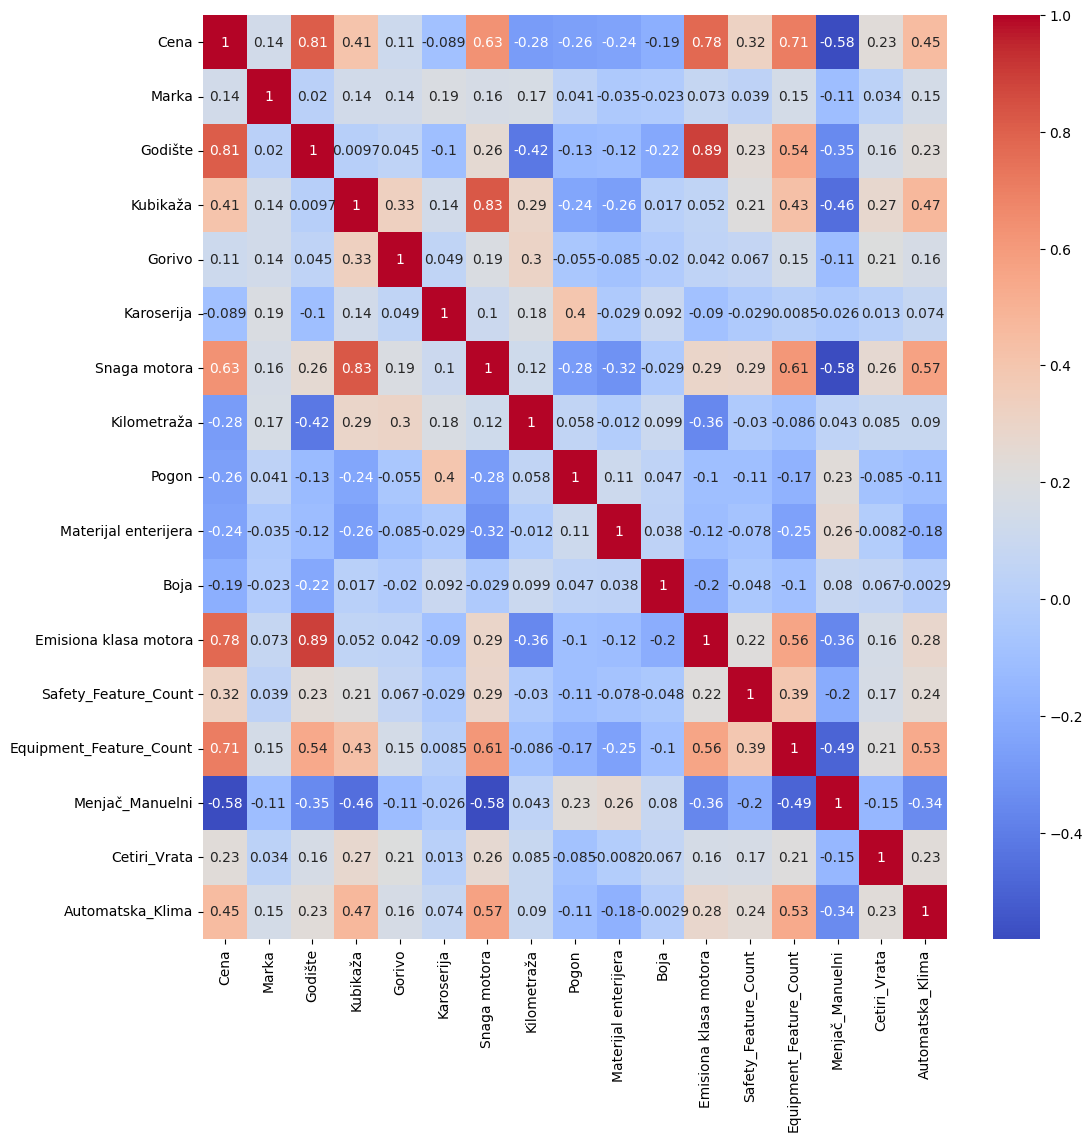

In [52]:
# racunanje korelacione matrice, ----- gledamo samo linearnu zavisnost ovdje
#yasto spearman a ne default pearson? -- jer je nas dataset poprilicno nebalansiran

correlation_matrix = df.corr(method = 'spearman',numeric_only=True)
# print(correlation_matrix)

# vizualiyacija pomocu heatmap-e
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Na osnovu heatmap-e , može se zaključiti sljedeće -- Godište i emisiona klasa motora imaju 0,89 zavisnost, što je poprilično blizu 1,00
#1,00 predstavlja perfektnu pozitivnu koleraciju. iy tog rayloga cemo izbaciti jednu od kolona -- izbacicemo emisionu klasu
#Takođe Kubikaža i snaga motora imaju korelaciju 0,81. I ovdje cemo izbaciti jednu od kolona. -- izbacicemo snagu motora
#Sto se tice cene, Najjacu linearnu zavisnost vidimo sa godistem, snagom motora, emisionom klasom motora, 
#equipment feature count-om, (negativnu) menjac_manuelni. Takodje, vidimo da k ima jako mali korelacioni koeficijent, kao marka, kilometraza(sto je cudno)
# kao i cetiri_vrata i karoserija. mozemo izbaciti karoseriju.

In [53]:
df = df.drop('Karoserija', axis = 1)
df = df.drop('Emisiona klasa motora', axis=1)
df = df.drop('Snaga motora', axis=1)

In [54]:
print(df)

         Cena     Marka  Godište  Kubikaža  Gorivo  Kilometraža  Pogon  \
0      3200.0  0.075431   2006.0 -0.156051       1     0.624057      1   
1      9500.0  0.104680   2013.0 -0.339346       1    -0.020582      1   
2      4000.0  0.054803   2008.0  0.281356       1     0.518757      1   
3      3300.0  0.058805   2008.0  0.479231       1    -0.049934      1   
4      3550.0  0.075431   2009.0 -1.107933       2     0.368513      1   
...       ...       ...      ...       ...     ...          ...    ...   
3323  34990.0  0.093288   2016.0  2.566288       1    -0.446491      0   
3324  17500.0  0.104680   2016.0  0.431324       1     0.082054      1   
3325  10500.0  0.143781   2017.0 -0.339346       1     0.155529      1   
3326  13500.0  0.054803   2017.0  0.497977       1    -0.534239      1   
3327  29200.0  0.008621   2017.0  0.495894       1    -0.815275      0   

      Materijal enterijera  Boja  Safety_Feature_Count  \
0                        1     4                   4.

In [55]:
print(df.shape)

(3001, 14)


In [56]:
df['Godište'] = scaler.fit_transform(df[['Godište']])

In [57]:
df.to_csv('sredjeni.csv',index=False)